In [26]:
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import time
import requests
from operator import itemgetter


In [18]:
songs_graph = {'Do I Wanna Know?': ['indie rock', 'indie', 'alternative'], 'indie rock': ['Do I Wanna Know?', 'Mr. Brightside', 'R U Mine?'], 'indie': ['Do I Wanna Know?', 'Mr. Brightside', 'R U Mine?', 'Pumped Up Kicks', 'The Less I Know the Better'], 'alternative': ['Do I Wanna Know?', 'Losing My Religion', 'Seven Nation Army', 'The Less I Know the Better'], 'Mr. Brightside': ['rock', 'indie', 'indie rock'], 'rock': ['Mr. Brightside', 'Losing My Religion', 'Seven Nation Army', 'Smells Like Teen Spirit'], 'R U Mine?': ['indie rock', 'indie', 'british'], 'british': ['R U Mine?'], 'Take on Me': ['80s', 'pop', 'new wave'], '80s': ['Take on Me'], 'pop': ['Take on Me', 'Sorry'], 'new wave': ['Take on Me'], 'Pumped Up Kicks': ['indie', 'indie pop', 'catchy'], 'indie pop': ['Pumped Up Kicks'], 'catchy': ['Pumped Up Kicks'], 'Losing My Religion': ['rock', '90s', 'alternative'], '90s': ['Losing My Religion'], 'Seven Nation Army': ['rock', 'alternative rock', 'alternative'], 'alternative rock': ['Seven Nation Army'], 'Sorry': ['pop', 'justin bieber', 'dancehall'], 'justin bieber': ['Sorry'], 'dancehall': ['Sorry'], 'Smells Like Teen Spirit': ['pop','Grunge', 'rock', 'Nirvana'], 'Grunge': ['Smells Like Teen Spirit'], 'Nirvana': ['Smells Like Teen Spirit'], 'The Less I Know the Better': ['indie', 'psychedelic', 'alternative'], 'psychedelic': ['The Less I Know the Better']}
songs_list = ['Do I Wanna Know?', 'Mr. Brightside', 'R U Mine?', 'Take on Me', 'Pumped Up Kicks', 'Losing My Religion', 'Seven Nation Army', 'Sorry', 'Smells Like Teen Spirit', 'The Less I Know the Better']
tags_list = ['indie rock', 'indie', 'alternative', 'rock', 'british', '80s', 'pop', 'new wave', 'indie pop', 'catchy', '90s', 'alternative rock', 'justin bieber', 'dancehall', 'Grunge', 'Nirvana', 'psychedelic']

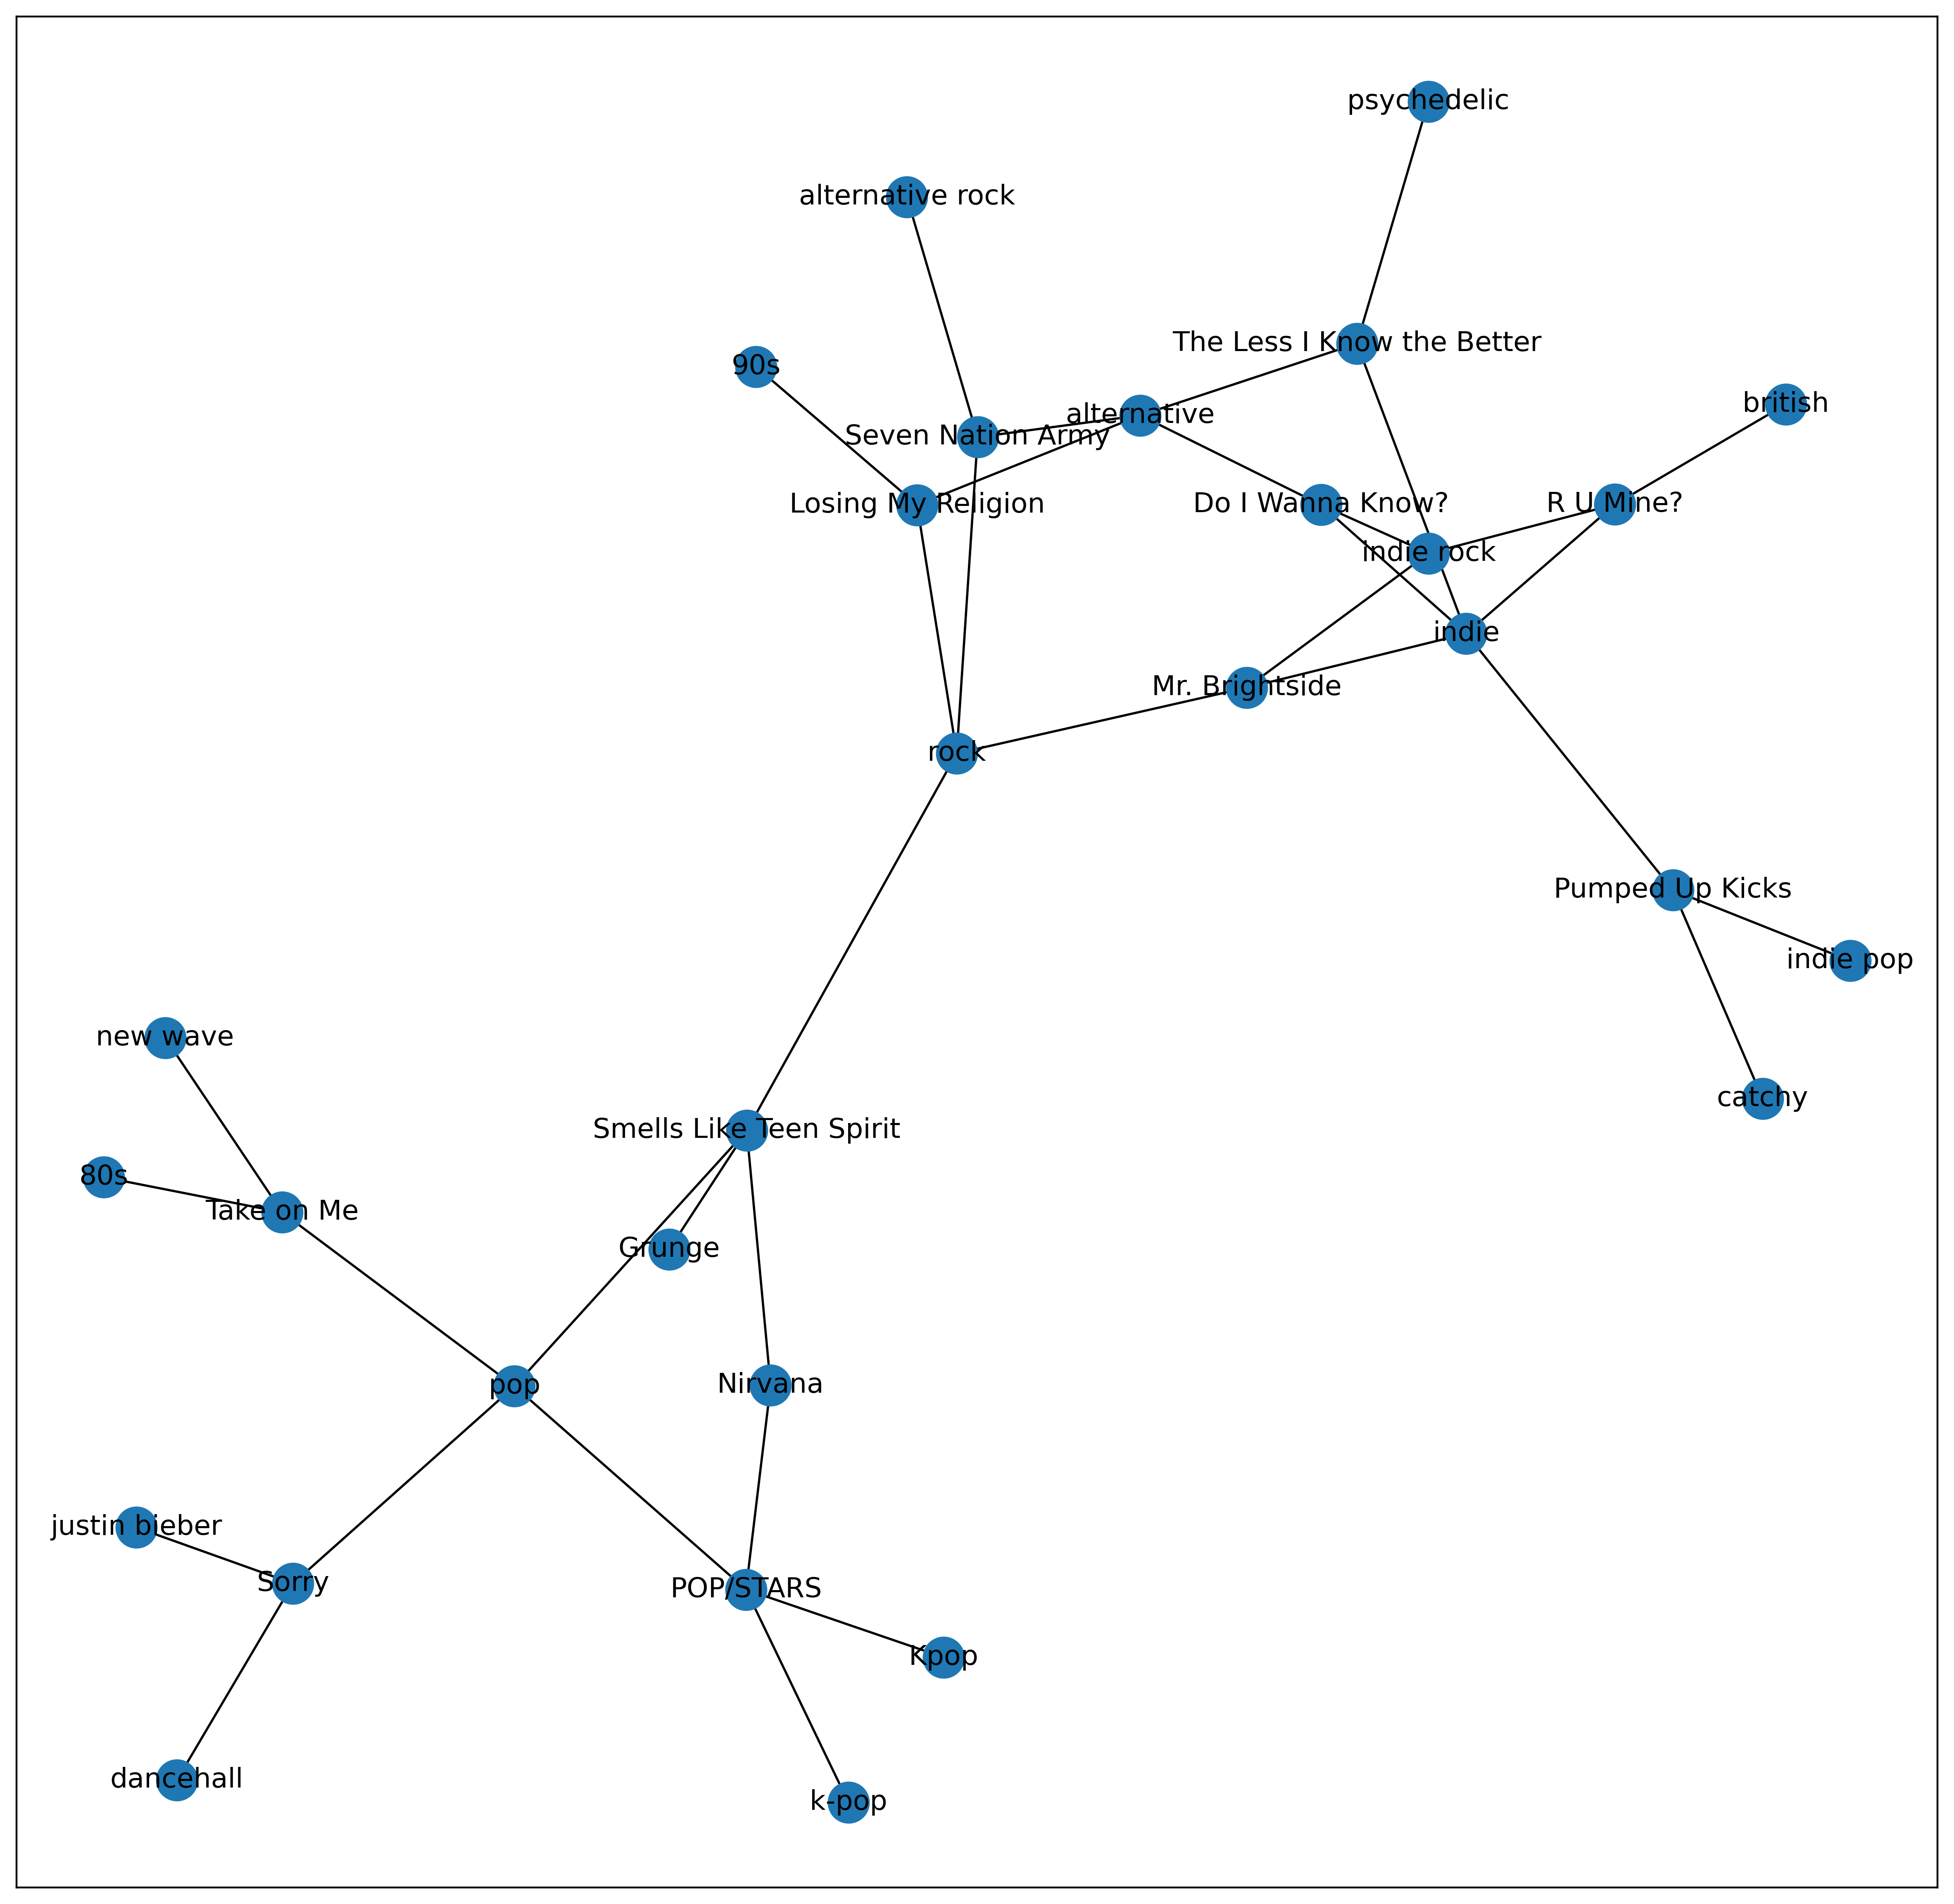

In [34]:
_graph = nx.Graph()

_graph.add_nodes_from(list(songs_graph.keys()))

for node in list(songs_graph.keys()):
    for edge in songs_graph[node]:
        _graph.add_edge(node,edge)
        
plt.figure(num=1,figsize=(15,15),dpi=400)

nx.draw_networkx(_graph)
plt.show()

In [20]:
def is_bipartide(G, start):

    if start not in G:
        return False
    
    level = 0  
    nextlevel = [start]  
    explored = {start: level}  
    while nextlevel:
        level = level + 1
        thislevel = nextlevel
        nextlevel = []
        for v in thislevel:
            for w in G[v]:
                if w not in explored:
                    explored[w] = level
                    nextlevel.append(w)
                elif explored[w] == explored[v]:
                    return False

    return True
is_bipartide(songs_graph, 'Do I Wanna Know?')

True

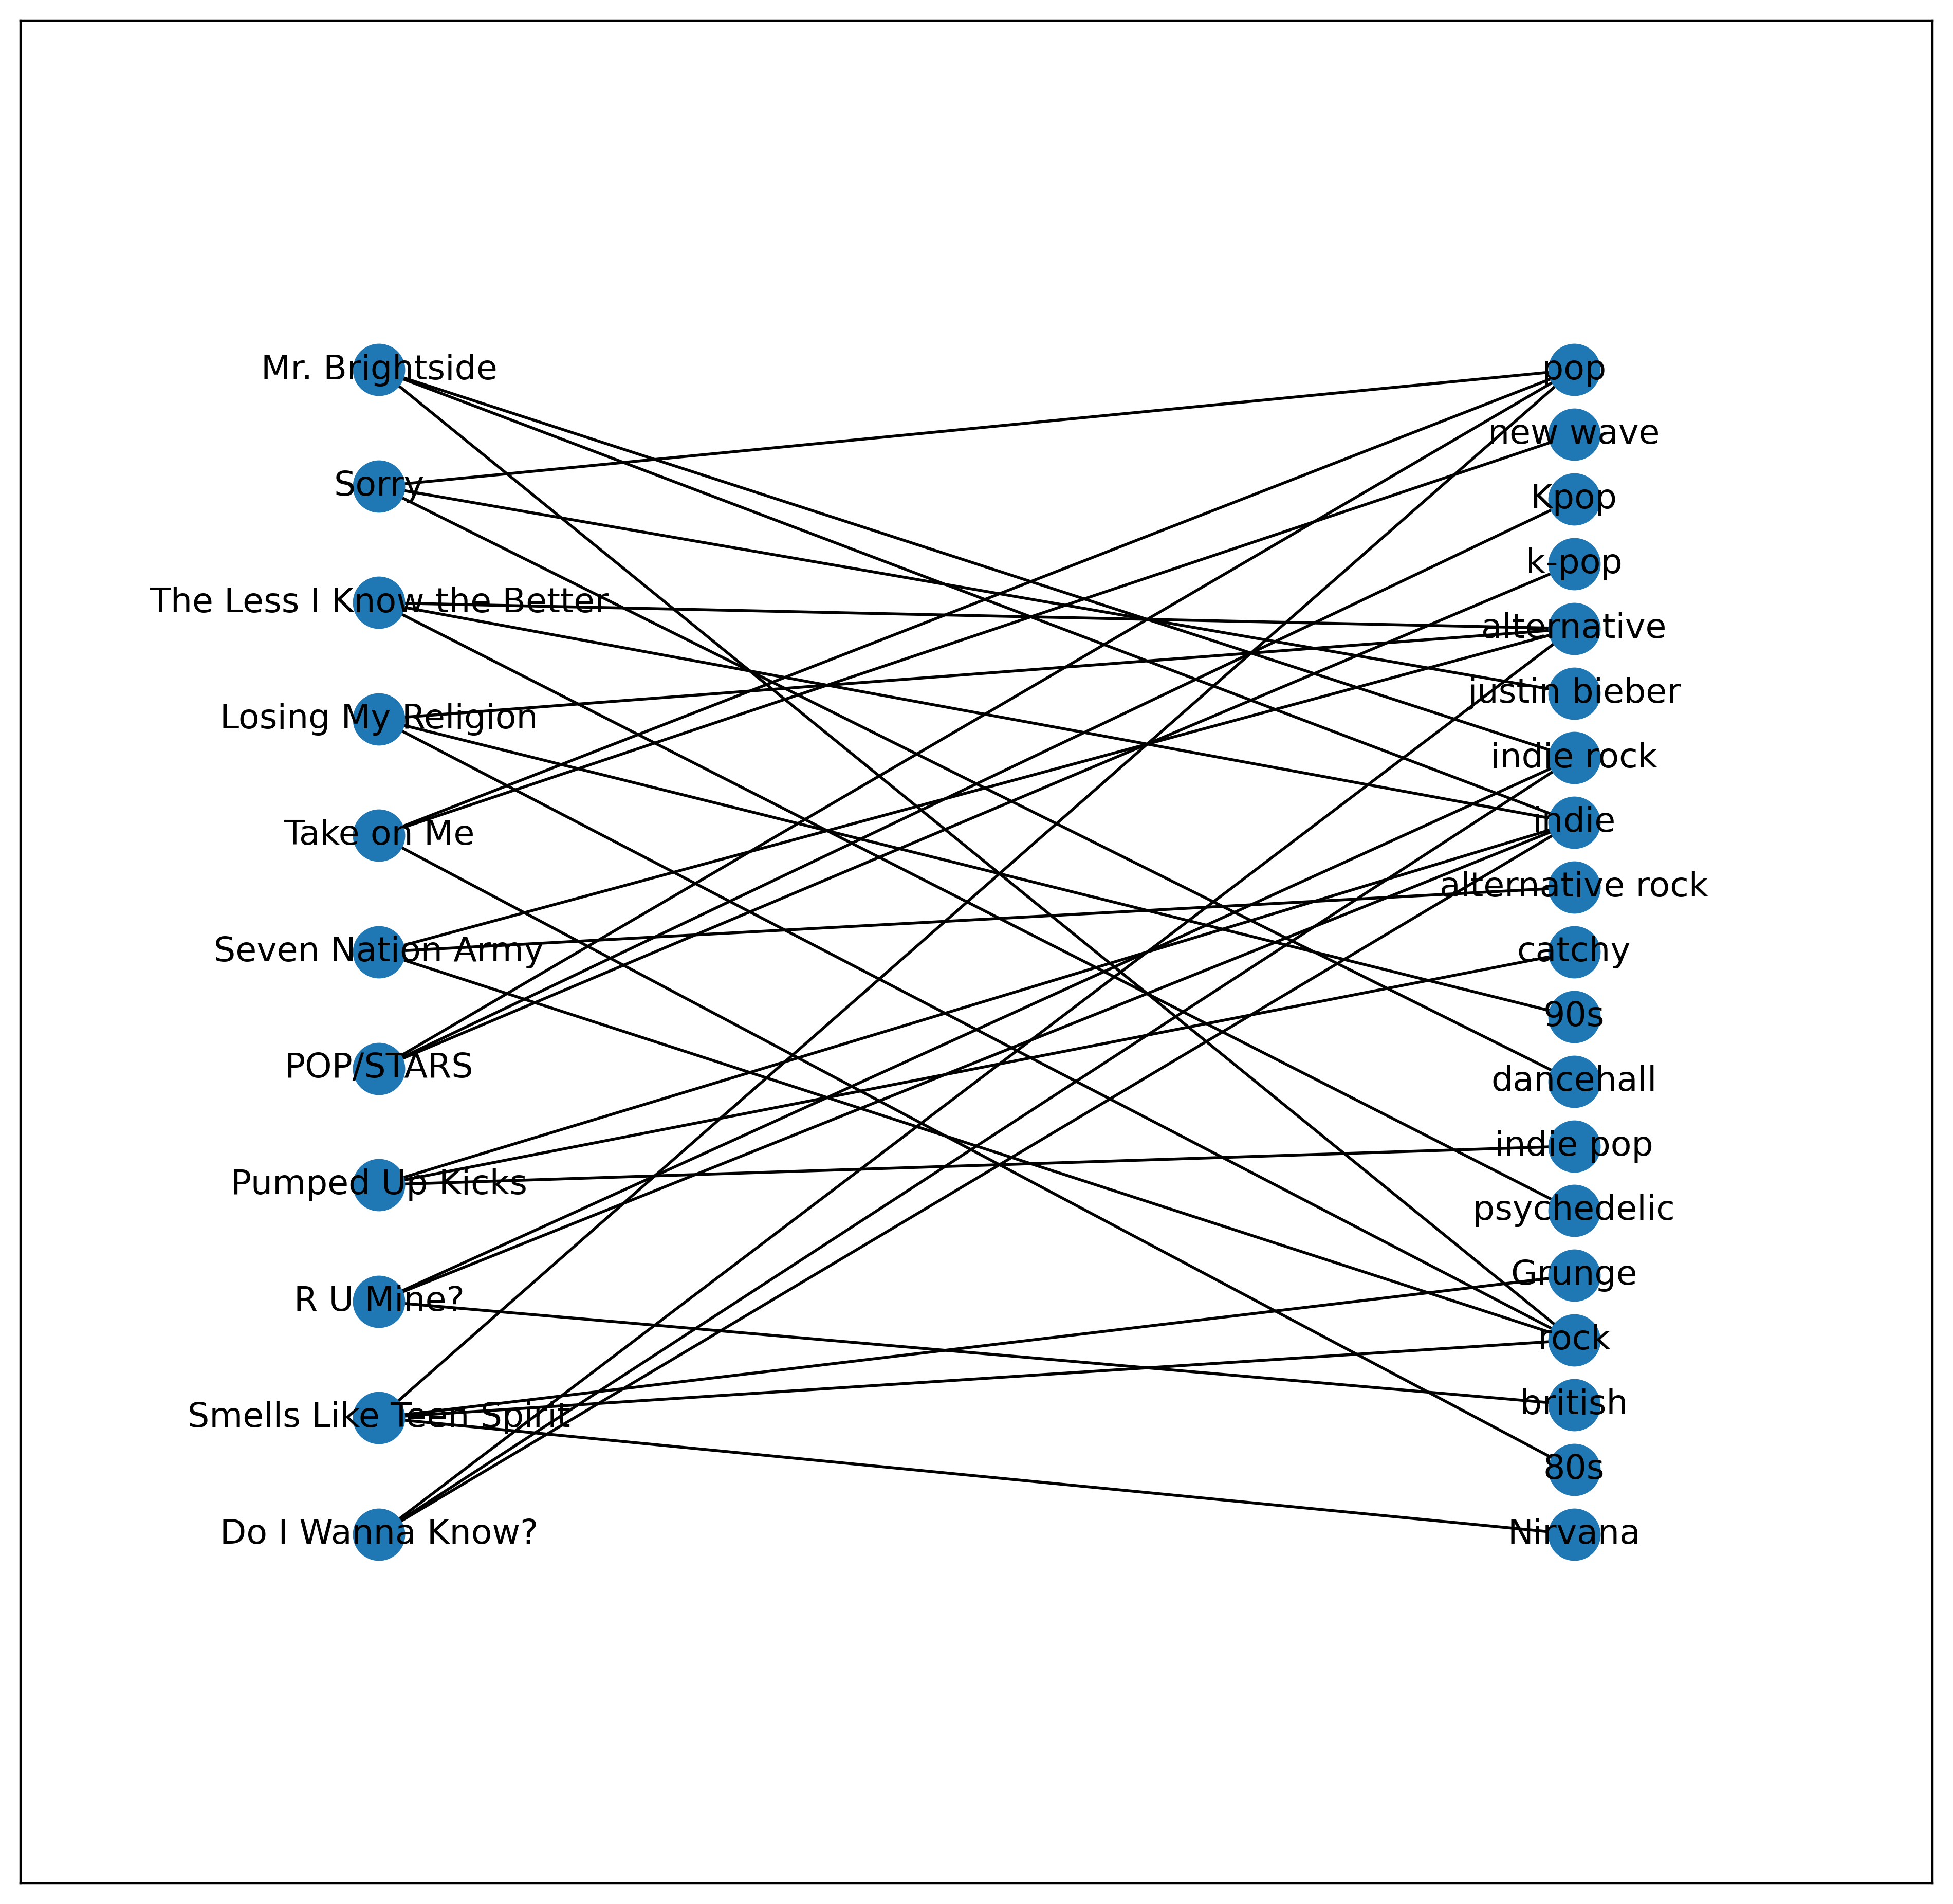

In [25]:
plt.figure(num=1,figsize=(12,12),dpi=400)
plt.margins(0.3)
nx.draw_networkx(
    _graph,
    pos = nx.drawing.layout.bipartite_layout(_graph, songs_list))
plt.show()

In [23]:
def lastfm_request(api_method,artist='',track=''):
    
    if api_method==0:
        method = f"track.gettoptags&artist={artist}&track={track}"
    else:
        method = f"track.search&track={track}&limit=1"
    
    key ="3dc1e72157f70010ef87db6b769fbfe7"
    API_URL = f'http://ws.audioscrobbler.com/2.0/?method={method}&api_key={key}&format=json'
    return requests.request(method='get', url=API_URL).json()

while True:
    song_name = input("Diga uma música que você gosta")
    result = lastfm_request(1,track=song_name)
    if result['results']['trackmatches']['track'] != []:
        break
    print('Musica nao encontrada, tente outra por favor')
        

result = result['results']['trackmatches']['track'][0]

print(f"Resultado: {result['name']} de {result['artist']}")

tags = lastfm_request(0,result['artist'],result['name'])['toptags']['tag'][:3]

if result['name'] not in songs_graph:
        songs_graph[result['name']] = []
        songs_list.append(result['name'])
        for tag in tags:
            songs_graph[result["name"]].append(tag["name"])
            if tag["name"] not in songs_graph:
                tags_list.append(tag["name"])
                songs_graph[tag["name"]] = [result["name"]]
            else:
                songs_graph[tag["name"]].append(result["name"])
                


Diga uma música que você gostapop stars
Resultado: POP/STARS de K/DA


In [38]:
%%time
def dfs_caminhos(grafo, inicio, fim):
    pilha = [(inicio, [inicio])]
    depth = 0
    while pilha:
        vertice, caminho = pilha.pop()
        for proximo in set(grafo[vertice]) - set(caminho):
            if proximo == fim:
                yield caminho + [proximo]
            else:
                pilha.append((proximo, caminho + [proximo]))


songs_graph[result['name']].append('Nirvana')
songs_graph['Nirvana'].append(result['name'])
best_matches = []
for node in songs_list:
    answers = [len(x) for x in list(dfs_caminhos(songs_graph, node, result['name']))]

    if answers:
        num_paths = answers.count(min(answers))
        path_lenght = min(answers)
        best_matches.append({'name':node,'lenght':path_lenght,'number':num_paths})

best_matches = sorted(best_matches, key=lambda k: (k['lenght'], -k['number']))
best_matches

CPU times: user 4.44 ms, sys: 872 µs, total: 5.31 ms
Wall time: 4.8 ms


[{'name': 'Smells Like Teen Spirit', 'lenght': 3, 'number': 2},
 {'name': 'Take on Me', 'lenght': 3, 'number': 1},
 {'name': 'Sorry', 'lenght': 3, 'number': 1},
 {'name': 'Mr. Brightside', 'lenght': 5, 'number': 2},
 {'name': 'Losing My Religion', 'lenght': 5, 'number': 2},
 {'name': 'Seven Nation Army', 'lenght': 5, 'number': 2},
 {'name': 'Do I Wanna Know?', 'lenght': 7, 'number': 8},
 {'name': 'The Less I Know the Better', 'lenght': 7, 'number': 6},
 {'name': 'R U Mine?', 'lenght': 7, 'number': 4},
 {'name': 'Pumped Up Kicks', 'lenght': 7, 'number': 2}]

In [48]:
%%time
def predecessor(G, start):

    if start not in G:
        raise False

    level = 0  
    nextlevel = [start]  
    explored = {start: level}  
    pred = {start: []}  
    while nextlevel:
        level = level + 1
        thislevel = nextlevel
        nextlevel = []
        for v in thislevel:
            for w in G[v]:
                if w not in explored:
                    pred[w] = [v]
                    explored[w] = level
                    nextlevel.append(w)
                elif explored[w] == level:  
                    pred[w].append(v)  

    return pred

def find_paths(start, target, pred):

    if target not in pred or {target}==start:
        return None

    explored = {target}
    stack = [[target, 0]]
    top = 0
    while top >= 0:
        node, i = stack[top]
        if node in start:
            yield [p for p, n in reversed(stack[: top + 1])]
        if len(pred[node]) > i:
            stack[top][1] = i + 1
            next = pred[node][i]
            if next in explored:
                continue
            else:
                explored.add(next)
            top += 1
            if top == len(stack):
                stack.append([next, 0])
            else:
                stack[top][:] = [next, 0]
        else:
            explored.discard(node)
            top -= 1


best_matches = []

for node in songs_list:
    parentage = predecessor(songs_graph, node)
    paths = list(_build_paths_from_predecessors({node}, result['name'], parentage))
    if paths != []:
        num_paths = len(paths)
        path_lenght = len(paths[0])
        best_matches.append({'name':node,'lenght':path_lenght,'number':num_paths})

best_matches = sorted(best_matches, key=lambda k: (k['lenght'], -k['number']))
best_matches

    

CPU times: user 823 µs, sys: 161 µs, total: 984 µs
Wall time: 993 µs


[{'name': 'Smells Like Teen Spirit', 'lenght': 3, 'number': 7},
 {'name': 'Take on Me', 'lenght': 3, 'number': 1},
 {'name': 'Sorry', 'lenght': 3, 'number': 1},
 {'name': 'Mr. Brightside', 'lenght': 5, 'number': 7},
 {'name': 'Losing My Religion', 'lenght': 5, 'number': 7},
 {'name': 'Seven Nation Army', 'lenght': 5, 'number': 7},
 {'name': 'Do I Wanna Know?', 'lenght': 7, 'number': 28},
 {'name': 'The Less I Know the Better', 'lenght': 7, 'number': 21},
 {'name': 'R U Mine?', 'lenght': 7, 'number': 14},
 {'name': 'Pumped Up Kicks', 'lenght': 7, 'number': 7}]

In [24]:

def is_bipartide(G, start):

    if start not in G:
        return False
    
    level = 0  
    nextlevel = [start]  
    explored = {start: level}  
    while nextlevel:
        level = level + 1
        thislevel = nextlevel
        nextlevel = []
        for v in thislevel:
            for w in G[v]:
                if w not in explored:
                    explored[w] = level
                    nextlevel.append(w)
                elif explored[w] == explored[v]:
                    return False

    return True

edges = [(1, 2), (2, 3), (2, 8), (3, 4), (4, 6), (5, 7), (5, 9), (8, 9)]
edges = {
    1: [2],
    2: [1,3,8],
    3: [2,4,8],
    4: [3,6],
    5: [7,9],
    6: [4],
    7: [5],
    8: [2,9,3],
    9: [5,8]
}
is_bipartide(edges,1)

False